In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from math import sqrt
import scipy as sp
import matplotlib.pyplot as plt
import urllib
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn import preprocessing

df=pd.read_csv("/Users/stansonwu/Downloads/ISOM 672/Project/archive/bank-additional-full.csv", sep=';')

print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [2]:
#Check unique values in each variable
for a in df.columns:
    b = df[a].unique()
    print(a)
    print(b)

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration
[ 261  149  226 ... 1246 1556 1868]
campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays
[999

In [3]:
df.info() #dtypes of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe() #Stats for the columns

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.shape #number of rows and columns

(41188, 21)

In [6]:
#We have no null values as shown below.
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


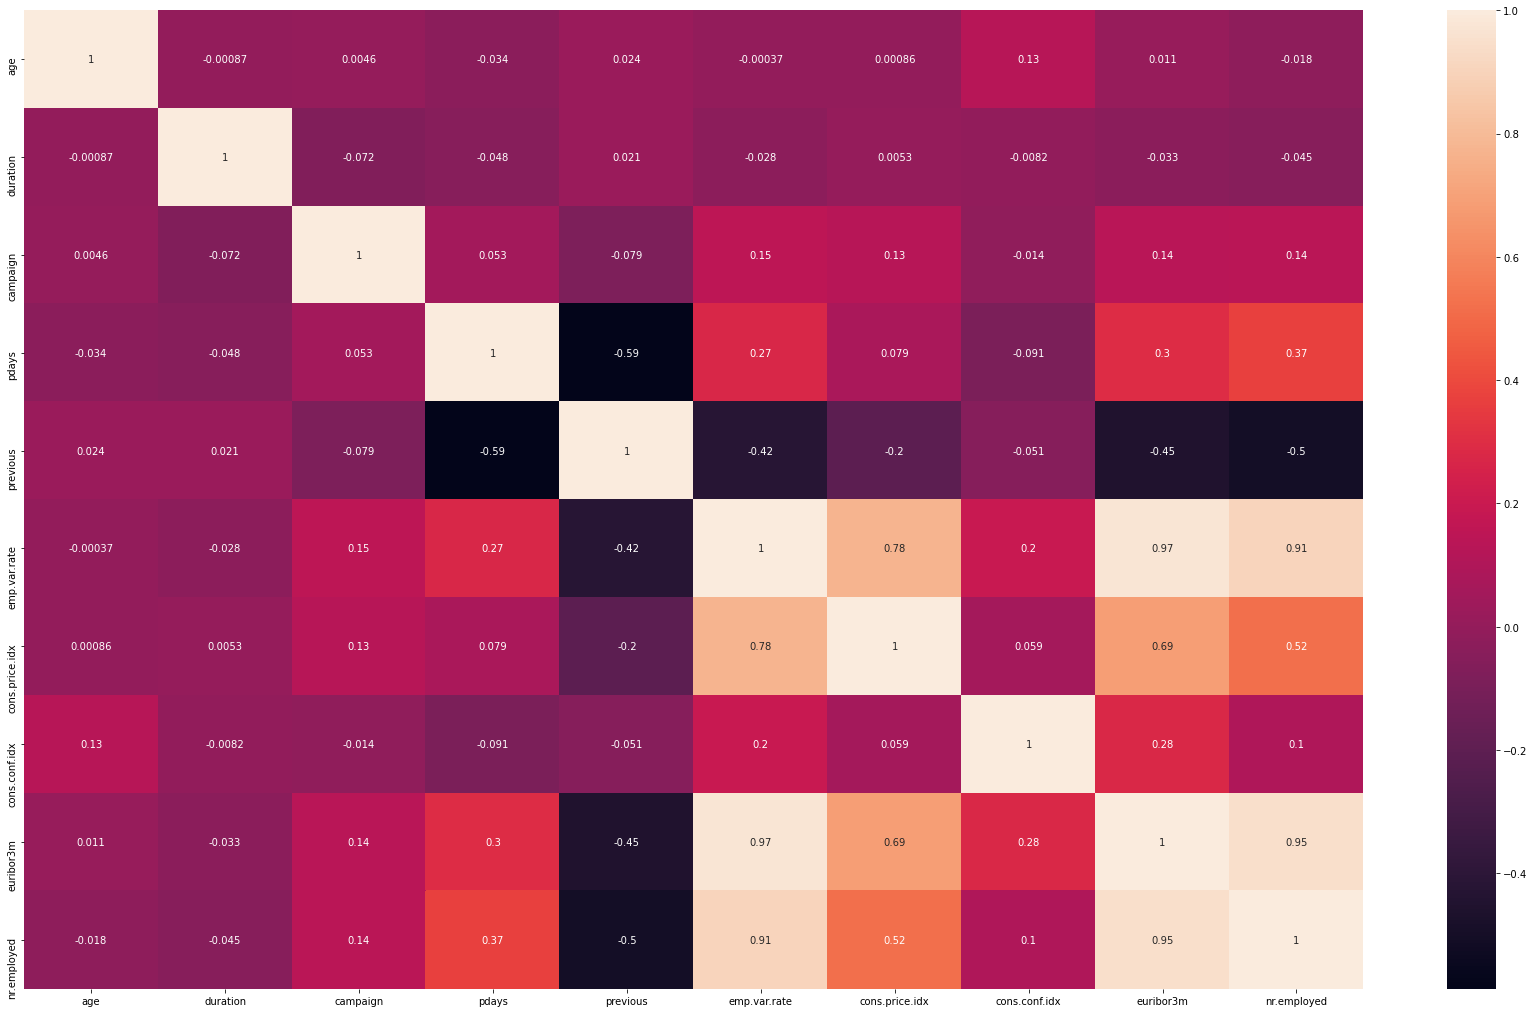

In [8]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(), annot = True)
plt.show() #correlation matrix

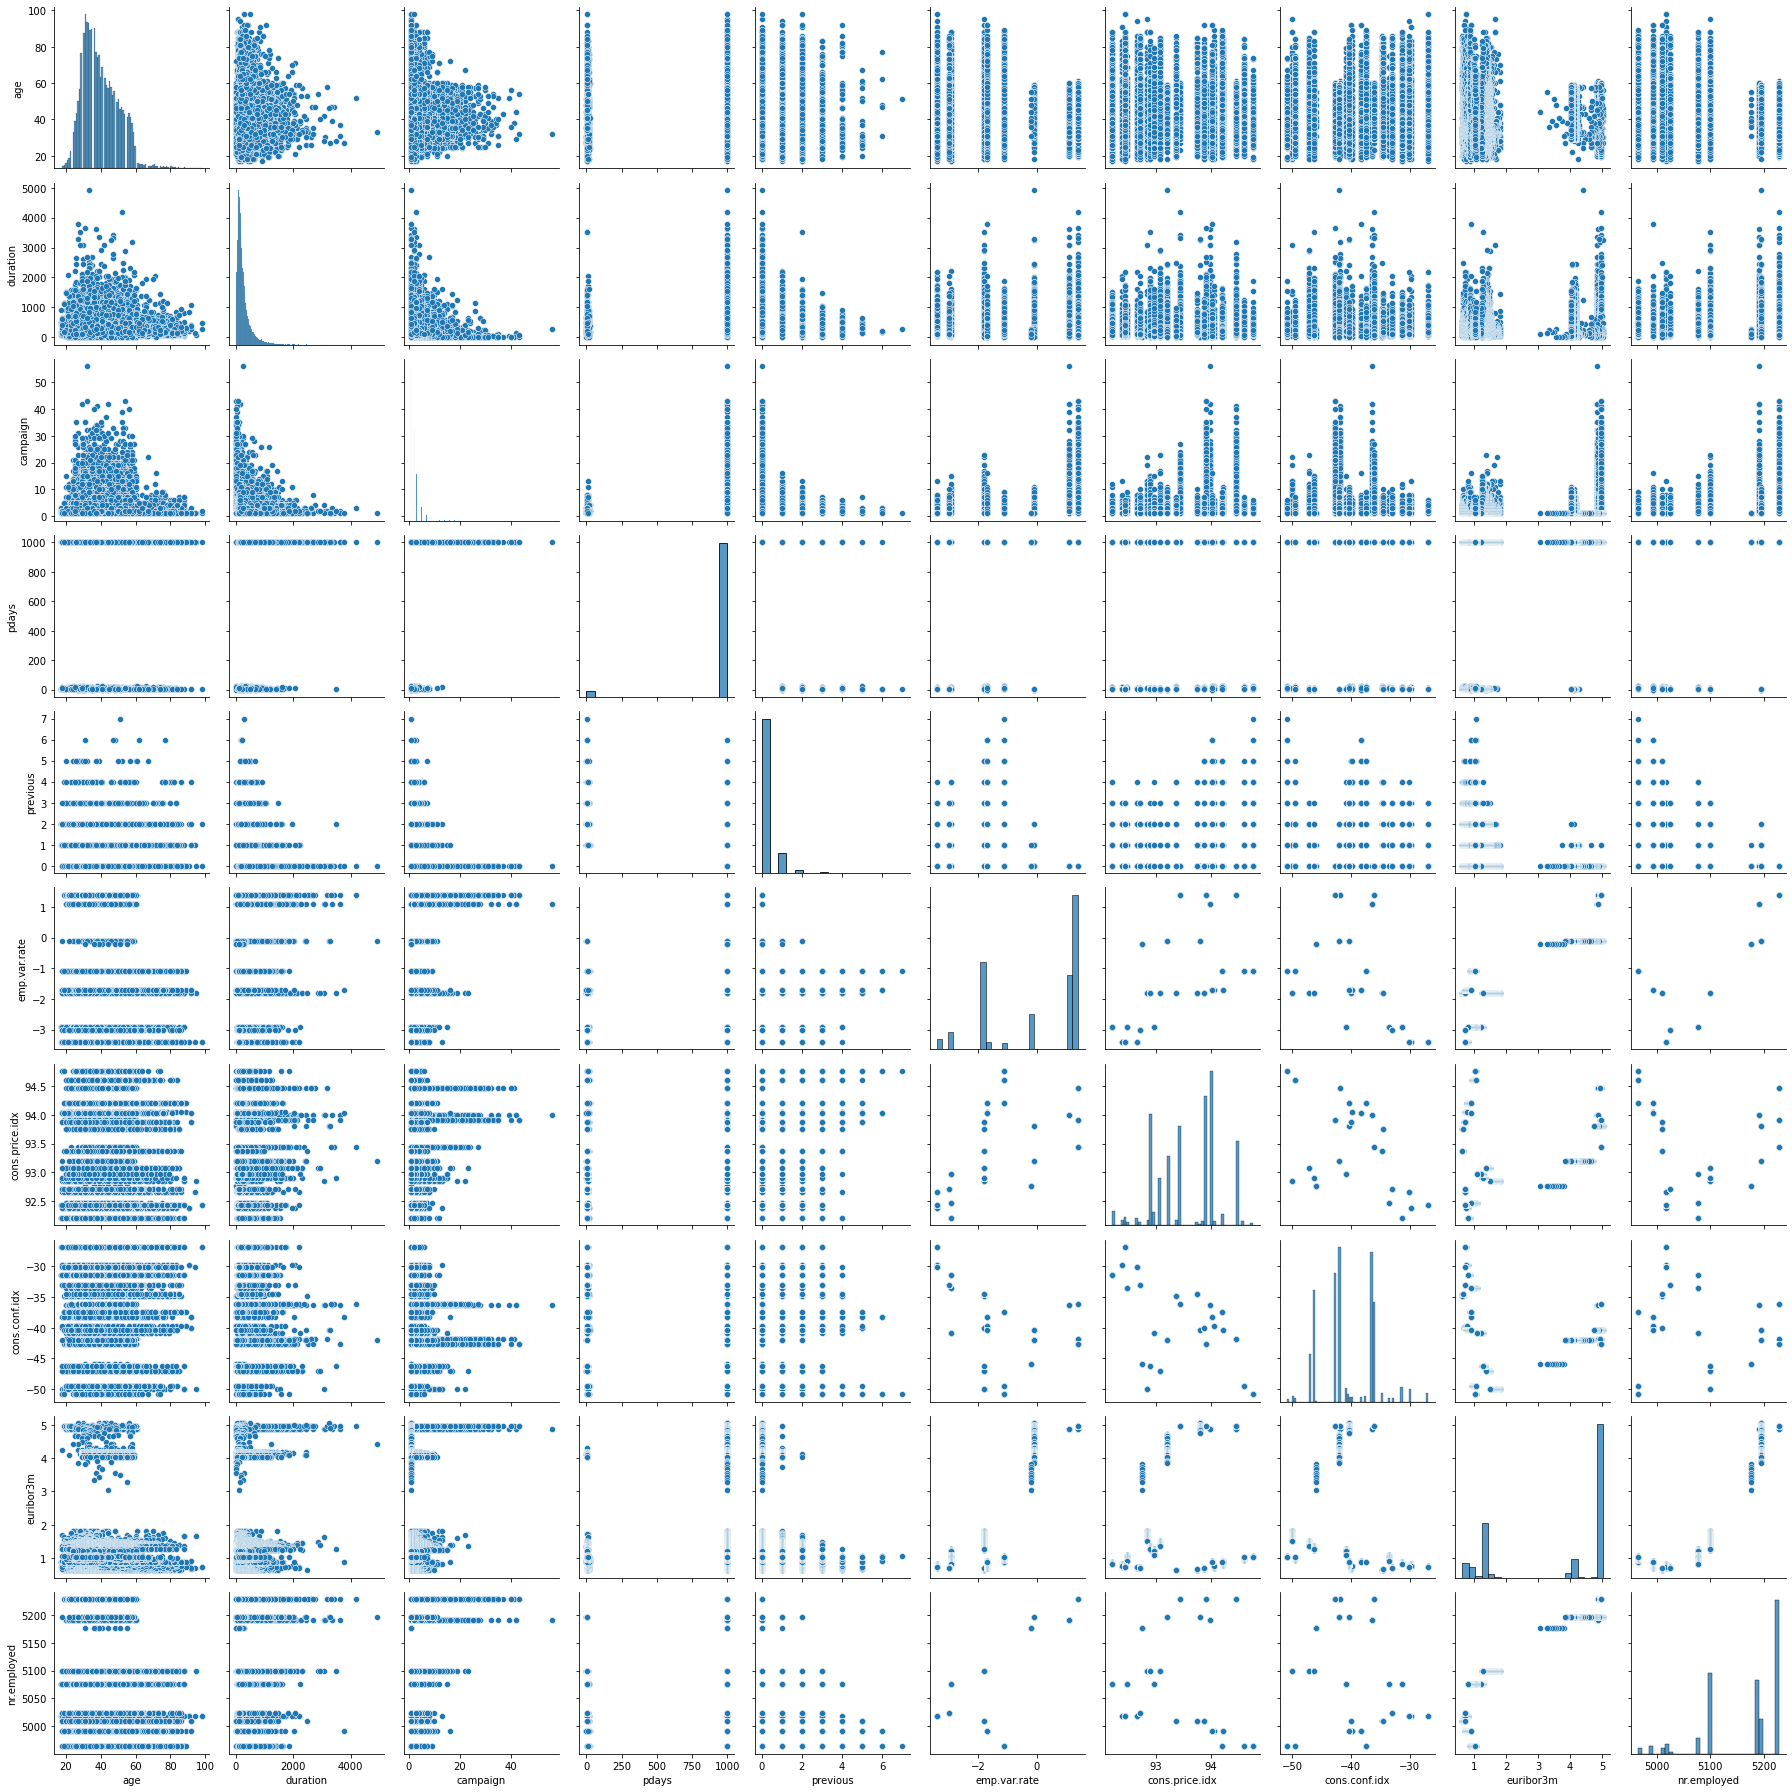

In [9]:
cols = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]

sns.pairplot(cols, 
             height=2.5)                      
plt.tight_layout()                             
                                              
plt.show()

/Users/stansonwu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no     36548
yes     4640
Name: y, dtype: int64

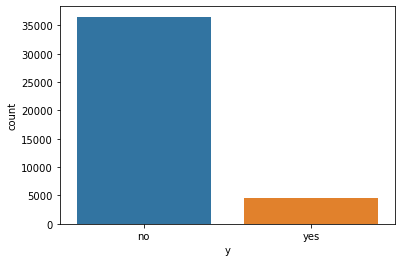

In [10]:
sns.countplot(df['y'], data=df['y'])
df['y'].value_counts()

In [11]:
df.nunique() #number of unique entries in each column

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

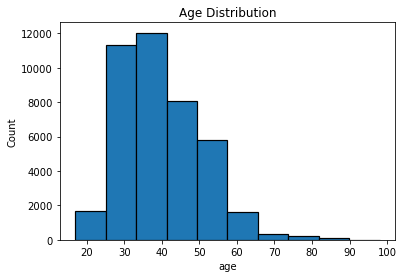

In [12]:
plt.title("Age Distribution")
plt.ylabel("Count")
plt.xlabel("age")
counts, edges, bars= plt.hist(df['age'],bins=10,edgecolor='black', linewidth=1.2)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

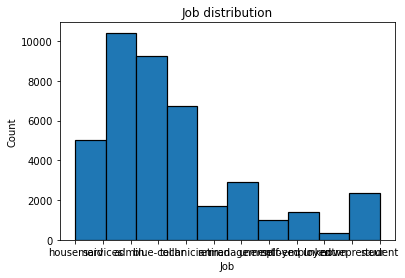

In [13]:
plt.title("Job distribution")
plt.ylabel("Count")
plt.xlabel("Job")
counts, edges, bars= plt.hist(df['job'],edgecolor='black', linewidth=1.2)
plt.bar_label(bars)
plt.xticks(rotation=40)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

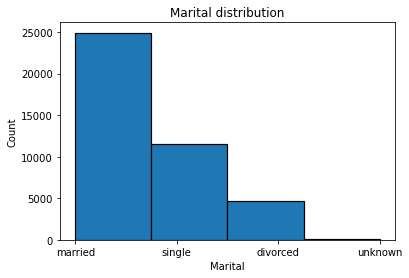

In [14]:
plt.title("Marital distribution")
plt.ylabel("Count")
plt.xlabel("Marital")
counts, edges, bars= plt.hist(df['marital'],edgecolor='black', linewidth=1.2, bins=4)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

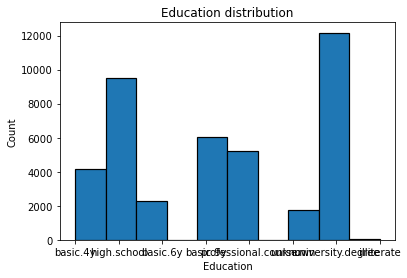

In [15]:
plt.title("Education distribution")
plt.ylabel("Count")
plt.xlabel("Education")
counts, edges, bars= plt.hist(df['education'],edgecolor='black', linewidth=1.2, bins=10)
plt.bar_label(bars)
plt.xticks(rotation=40)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

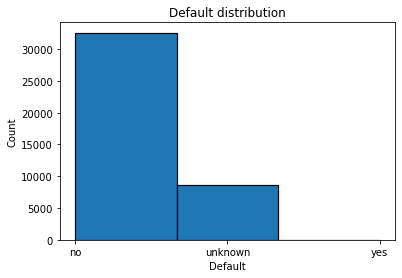

In [16]:
plt.title("Default distribution")
plt.ylabel("Count")
plt.xlabel("Default")
counts, edges, bars= plt.hist(df['default'],edgecolor='black', linewidth=1.2,bins=3)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

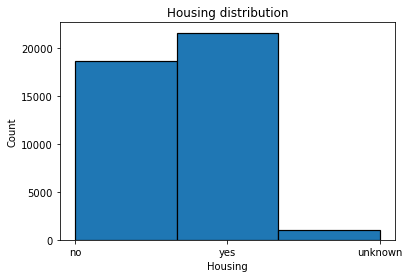

In [17]:
plt.title("Housing distribution")
plt.ylabel("Count")
plt.xlabel("Housing")
counts, edges, bars= plt.hist(df['housing'],edgecolor='black', linewidth=1.2, bins=3)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

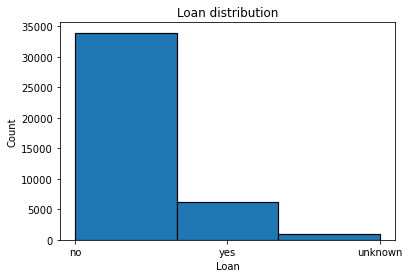

In [18]:
plt.title("Loan distribution")
plt.ylabel("Count")
plt.xlabel("Loan")
counts, edges, bars= plt.hist(df['loan'],edgecolor='black', linewidth=1.2, bins=3)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

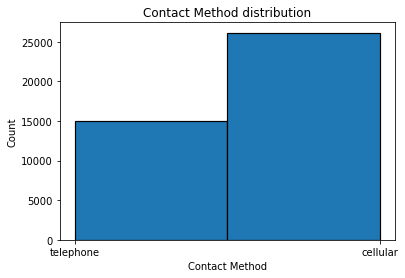

In [19]:
plt.title("Contact Method distribution")
plt.ylabel("Count")
plt.xlabel("Contact Method")
counts, edges, bars= plt.hist(df['contact'],edgecolor='black', linewidth=1.2, bins=2)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

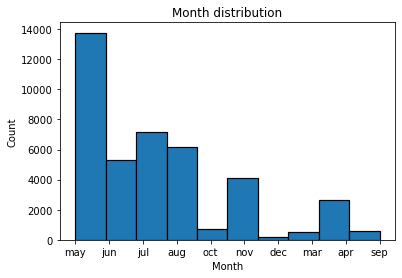

In [20]:
plt.title("Month distribution")
plt.ylabel("Count")
plt.xlabel("Month")
counts, edges, bars= plt.hist(df['month'],edgecolor='black', linewidth=1.2)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

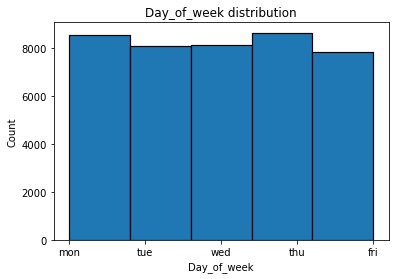

In [21]:
plt.title("Day_of_week distribution")
plt.ylabel("Count")
plt.xlabel("Day_of_week")
counts, edges, bars= plt.hist(df['day_of_week'],edgecolor='black', linewidth=1.2, bins=5)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

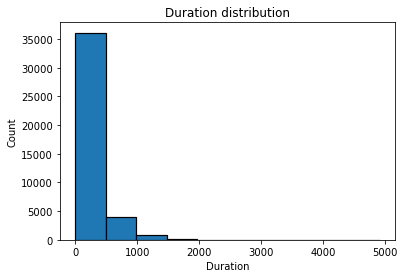

In [22]:
plt.title("Duration distribution")
plt.ylabel("Count")
plt.xlabel("Duration")
counts, edges, bars= plt.hist(df['duration'],edgecolor='black', linewidth=1.2)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

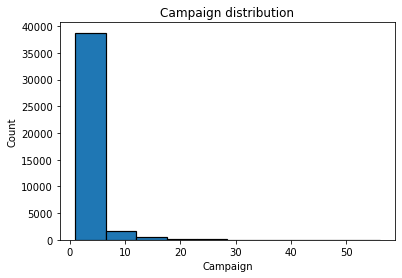

In [23]:
plt.title("Campaign distribution")
plt.ylabel("Count")
plt.xlabel("Campaign")
counts, edges, bars= plt.hist(df['campaign'],edgecolor='black', linewidth=1.2)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

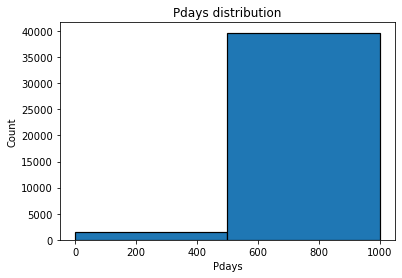

In [24]:
plt.title("Pdays distribution")
plt.ylabel("Count")
plt.xlabel("Pdays")
counts, edges, bars= plt.hist(df['pdays'],edgecolor='black', linewidth=1.2, bins=2)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

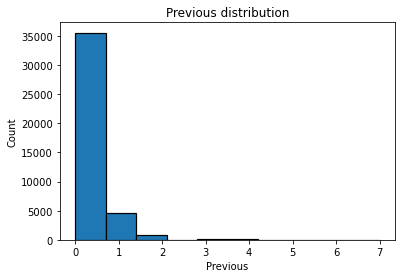

In [25]:
plt.title("Previous distribution")
plt.ylabel("Count")
plt.xlabel("Previous")
counts, edges, bars= plt.hist(df['previous'],edgecolor='black', linewidth=1.2)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

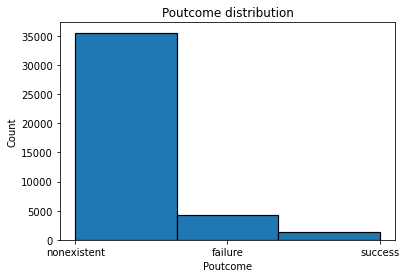

In [26]:
plt.title("Poutcome distribution")
plt.ylabel("Count")
plt.xlabel("Poutcome")
counts, edges, bars= plt.hist(df['poutcome'],edgecolor='black', linewidth=1.2, bins=3)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

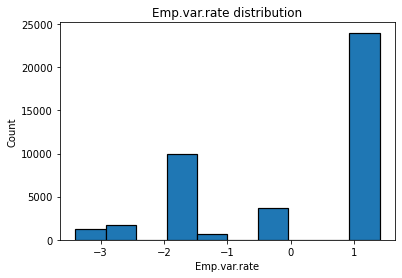

In [27]:
plt.title("Emp.var.rate distribution")
plt.ylabel("Count")
plt.xlabel("Emp.var.rate")
counts, edges, bars= plt.hist(df['emp.var.rate'],edgecolor='black', linewidth=1.2)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

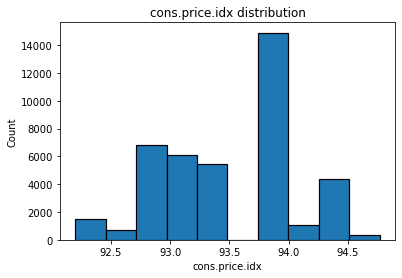

In [28]:
plt.title("cons.price.idx distribution")
plt.ylabel("Count")
plt.xlabel("cons.price.idx")
counts, edges, bars= plt.hist(df['cons.price.idx'],edgecolor='black', linewidth=1.2)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

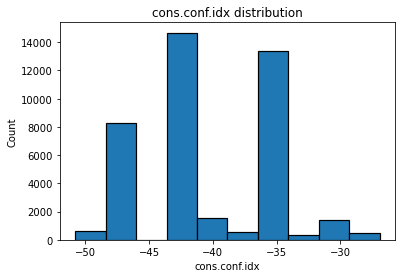

In [29]:
plt.title("cons.conf.idx distribution")
plt.ylabel("Count")
plt.xlabel("cons.conf.idx")
counts, edges, bars= plt.hist(df['cons.conf.idx'],edgecolor='black', linewidth=1.2)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

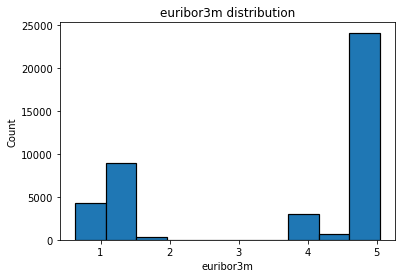

In [30]:
plt.title("euribor3m distribution")
plt.ylabel("Count")
plt.xlabel("euribor3m")
counts, edges, bars= plt.hist(df['euribor3m'],edgecolor='black', linewidth=1.2,bins=10)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

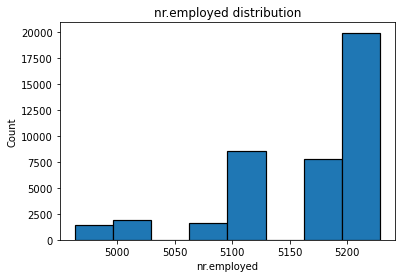

In [31]:
plt.title("nr.employed distribution")
plt.ylabel("Count")
plt.xlabel("nr.employed")
counts, edges, bars= plt.hist(df['nr.employed'],edgecolor='black', linewidth=1.2,bins=8)
plt.bar_label(bars)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

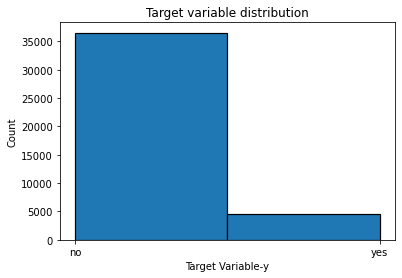

In [32]:
plt.title("Target variable distribution")
plt.ylabel("Count")
plt.xlabel("Target Variable-y")
counts, edges, bars= plt.hist(df['y'],edgecolor='black', linewidth=1.2, bins=2)
plt.bar_label(bars)
plt.show()